## The notebook below was written as part of the final project for the Data Science foundation class at Barcelona Technolgoy School by Rima Hinnawi
 

### The noteboook demonstrates an "end to end Machine Learning/sklearn workflow" for a Diabetes Detection app

The project will contain the following steps:

- Ingesting, exploring and cleaning data for your project
- Choosing/testing of algorithm approach
- Visualizing the results
- Packaging the project into a product

### Below is the process used: 

 - 1. Exploring and cleaning data for project
 - 2. Choosing the right algorithm
 - 3. Fitting the model/algorithm for our problem and using it to make predictions
 - 4. Evaluating the model
 - 5. Improving the model
 - 6. Saving and loading the trained model 
 - 7. Putting all together




In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Exploring and Cleaning Data


#### Pima Indians Diabetes Database
- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes based on certain diagnostic measurements. 
- This dataset has the following consraint: All patients here are females at least 21 years old of Pima Indian heritage.

#### Attribute Information:

- Number of times pregnant

- Plasma glucose concentration a 2 hours in an oral glucose tolerance test

- Diastolic blood pressure (mm Hg)

- Triceps skin fold thickness (mm)

- 2-Hour serum insulin (mu U/ml)

- Body mass index (weight in kg/(height in m)^2)

- Diabetes pedigree function

- Age (years)

#### Outcome 

- The Outcome value is "0" or "1" 
- "0" is for not Diabetic and "1" for Diabetic


In [5]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes_data.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


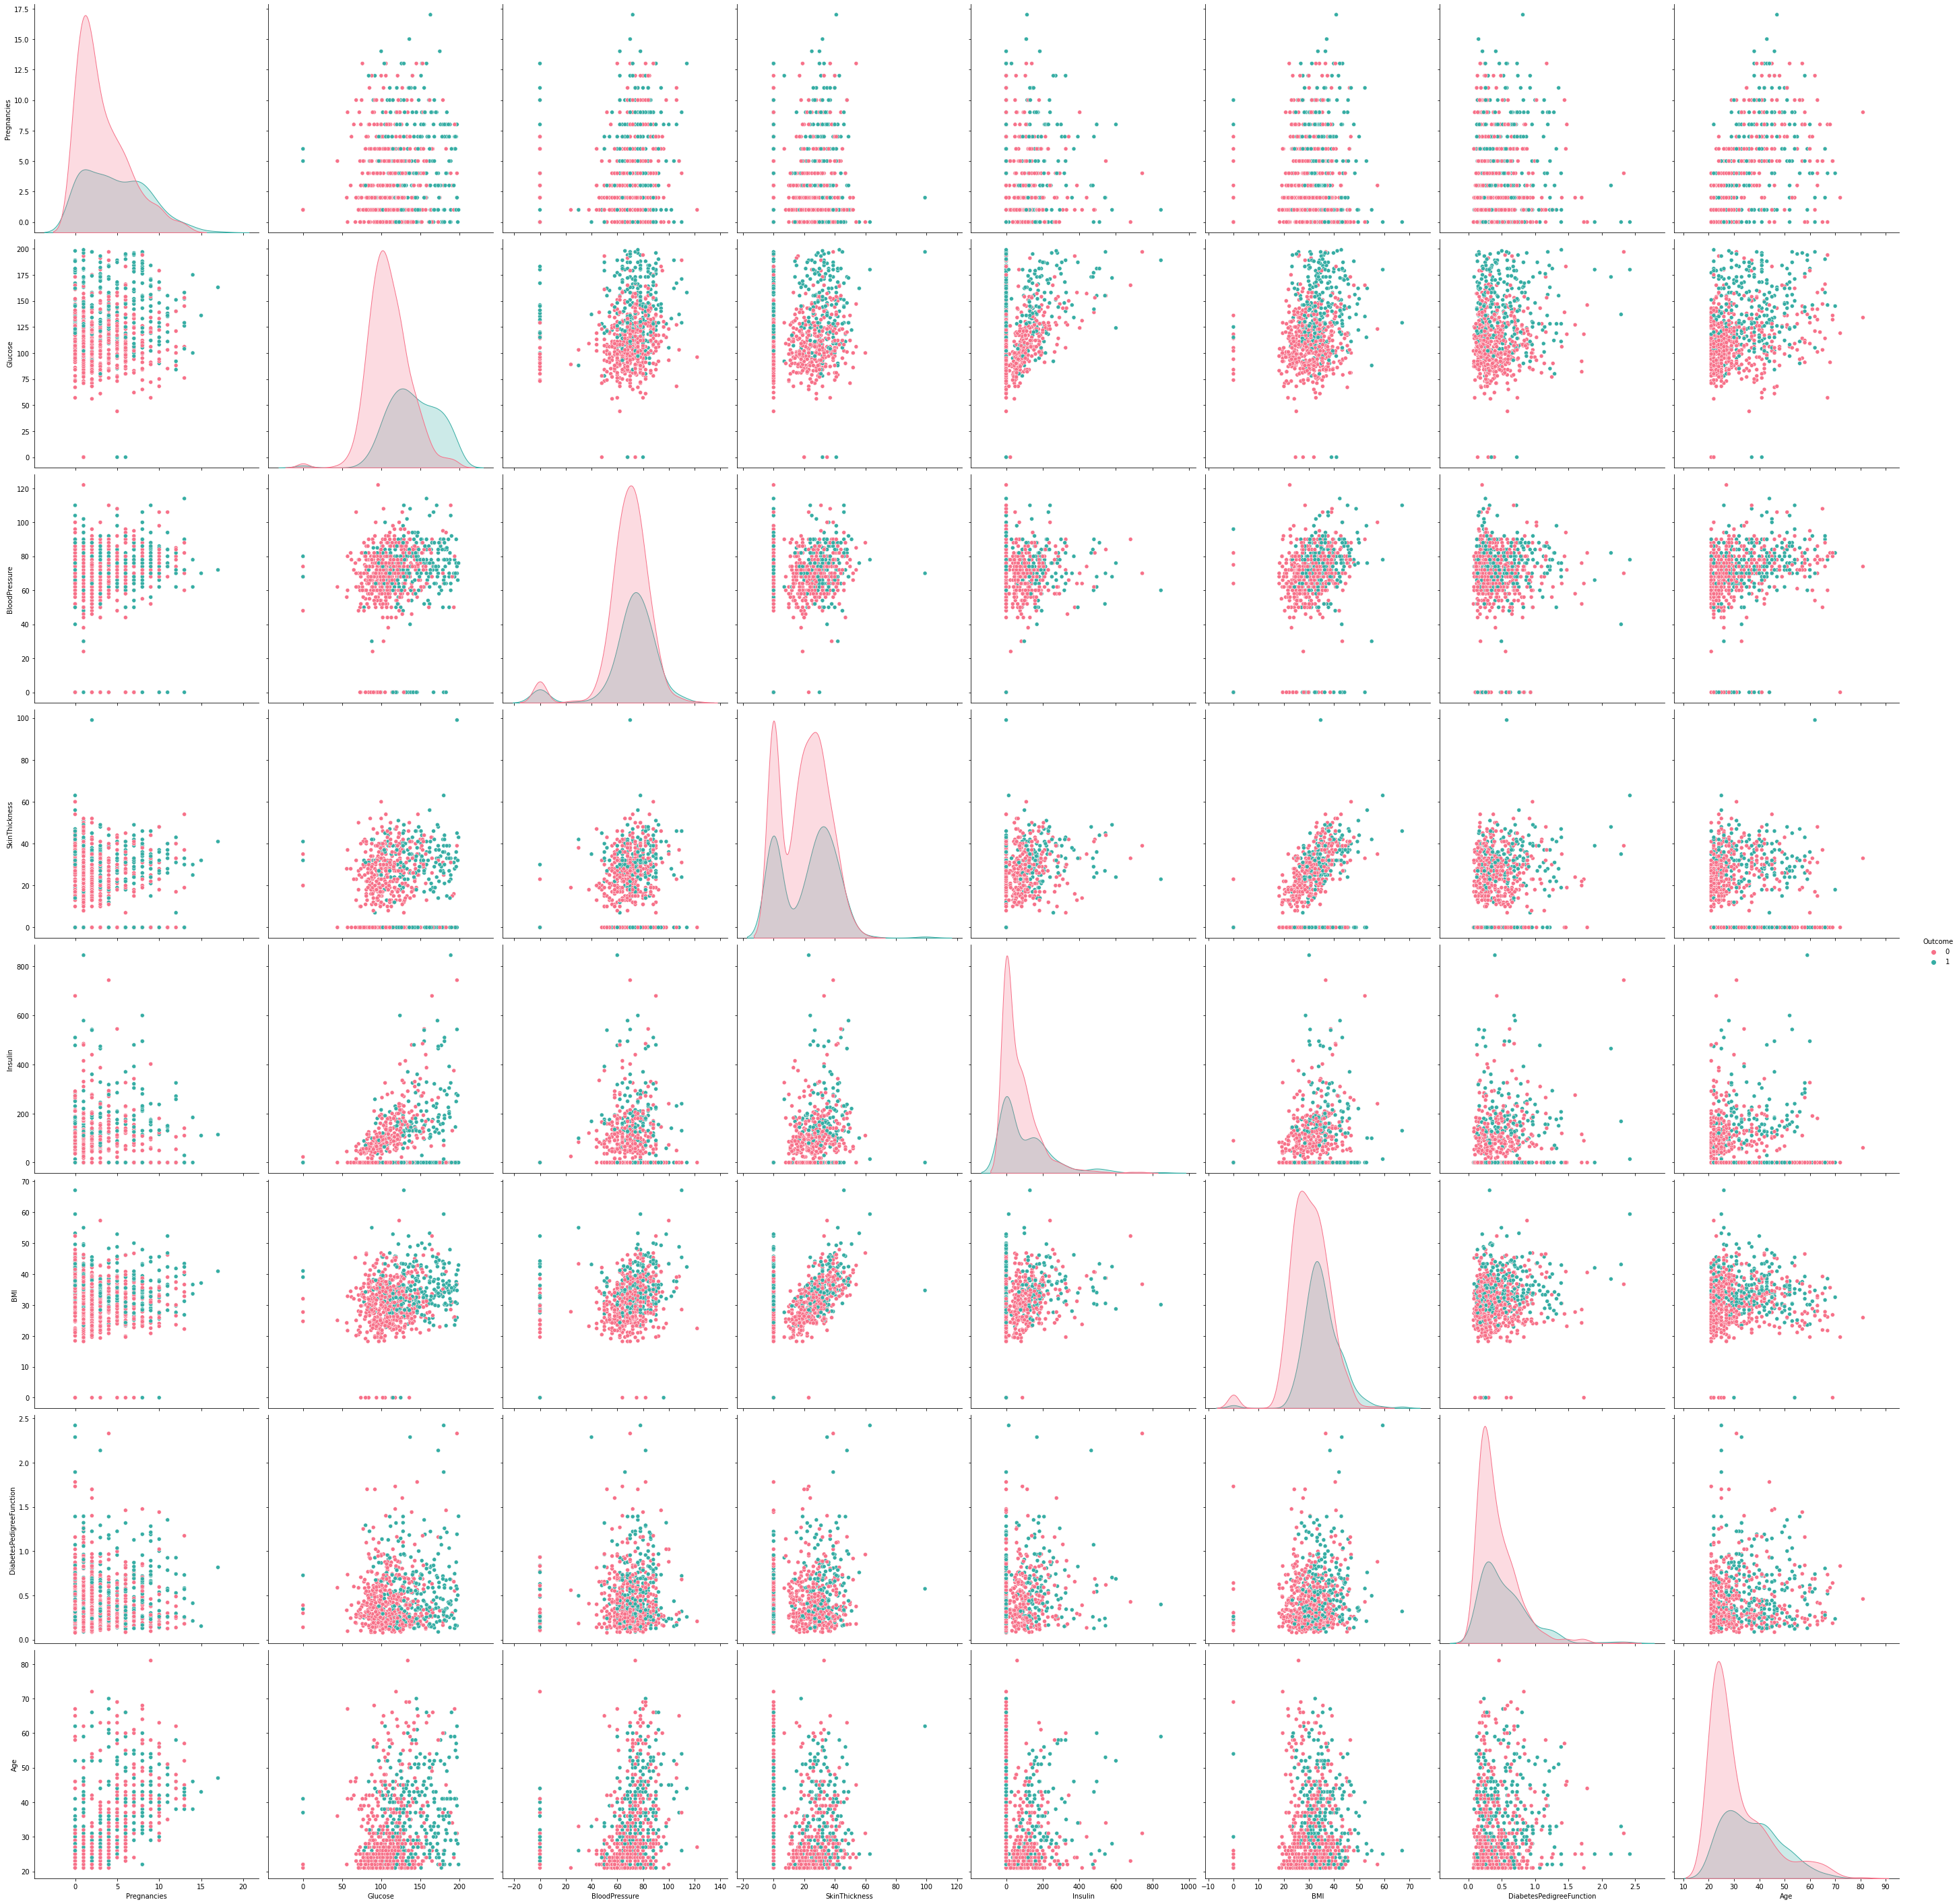

In [9]:
sns.pairplot(diabetes_data, hue="Outcome", palette="husl", height=5)

### Clean Data

#### It seems like "Pregnancy" has some outliers: it does not seem right that some have over 10... or 17 pregnancies!

#### The value  "0"  indicates missing value for some of the features

#### Based on the results above, the following columns have zero values that should not be 0:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

#### Lets clean the data so that it works better with Machine Learning

- Fill missing values 
- Split the data into features and labels:  'X' and 'y'


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

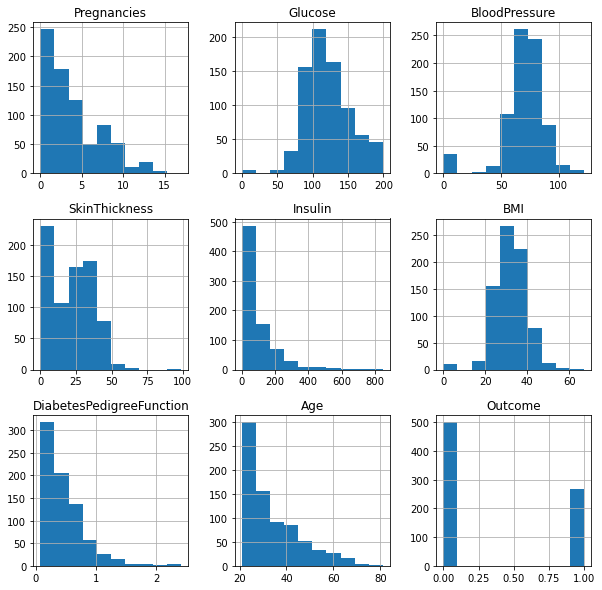

In [146]:
#plotting the data before cleaning it
diabetes_data.hist(figsize = (10,10))

In [147]:
#Based on plot above it looks like there are a few "0" values that should not be present
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI' should not have "0" values
#make a copy and replace "0" with np.Nan 
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## show the count of Nans 
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Fill missing values to clean data

In [148]:
#fill the nan values with mean or median based on its ditribution
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [149]:
# show the count of Nans after cleaning data
#looks like we got rid of all Nans
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [150]:
corr_matrix = diabetes_data_copy.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

<AxesSubplot:>

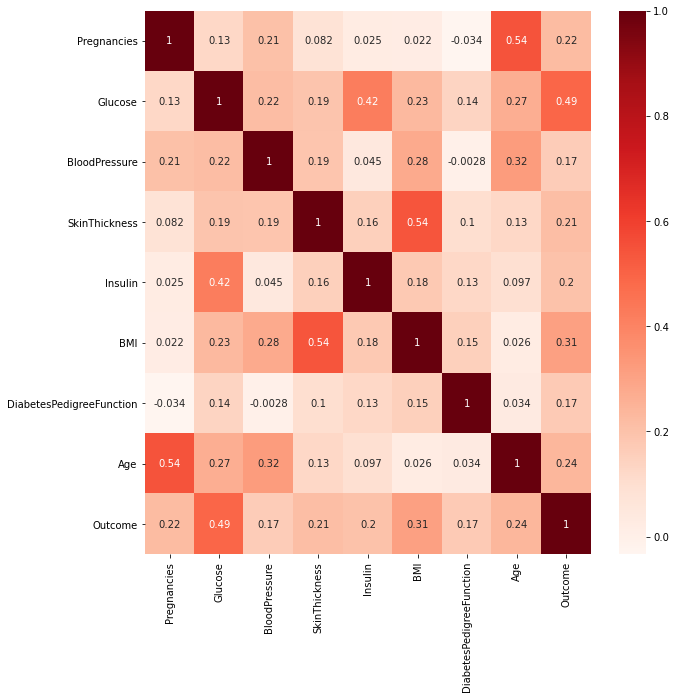

In [151]:
#heatmat of data
#Based on data above and heatmap, tt looks like Glucose is most important feature
plt.figure(figsize=(10,10)) 
sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap=plt.cm.Reds)

<AxesSubplot:>

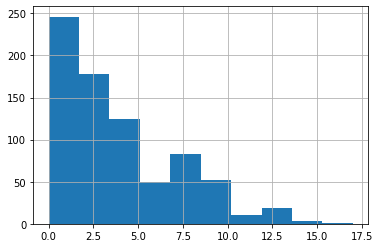

In [152]:
#In the It looks like we have outliers in "Pregnancies"
#prenancy has outliers. Does not sound right that there is data with 17 pregnancies
diabetes_data_copy["Pregnancies"].hist()

In [153]:
diabetes_data_copy.shape

(768, 9)

In [155]:
# Filter all rows for which the Pregnancy is higher than 10
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy['Pregnancies'] >10].index, inplace = True) 

In [157]:
#now we can check data shape
diabetes_data_copy.shape

(734, 9)

<AxesSubplot:>

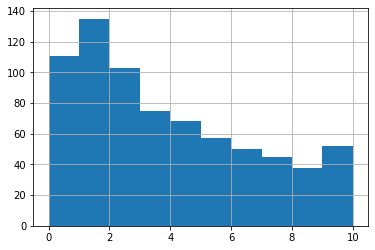

In [158]:
diabetes_data_copy["Pregnancies"].hist()

### Checking the balance in the outcome value

In [159]:
diabetes_data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

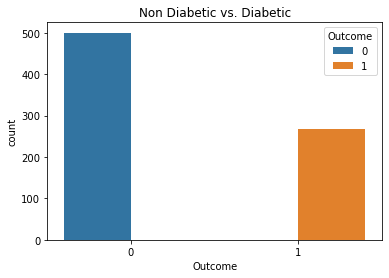

In [160]:
# it looks like data outcome is unbalanced: More "0" and less "1" in the dataset
plt.figure()
sns.countplot(x='Outcome',hue="Outcome", data=diabetes_data)
plt.title('Non Diabetic vs. Diabetic')
plt.show()

In [161]:
diabetes_data_copy.groupby('Outcome').size()

Outcome
0    486
1    248
dtype: int64

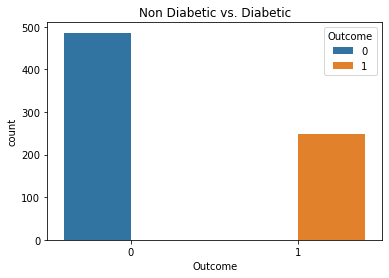

In [164]:

plt.figure()
sns.countplot(x='Outcome',hue="Outcome", data=diabetes_data_copy)
plt.title('Non Diabetic vs. Diabetic')
plt.show()

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

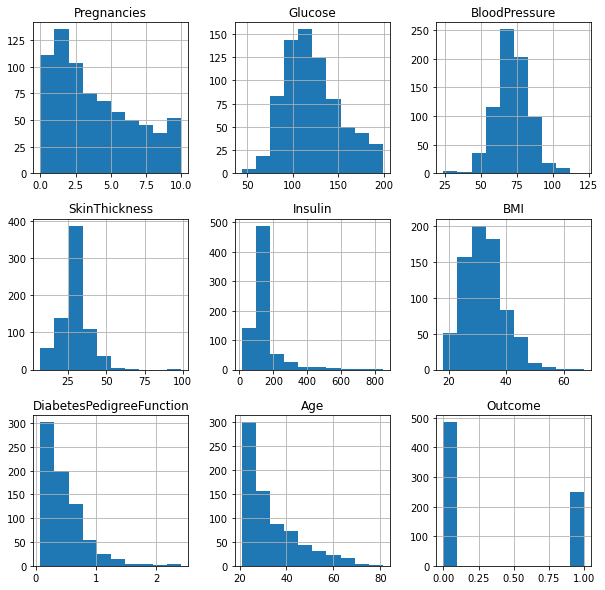

In [165]:
#plot after removing nans
diabetes_data_copy.hist(figsize = (10,10))

<AxesSubplot:>

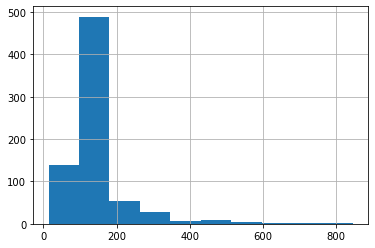

In [172]:
diabetes_data_copy["Insulin"].hist()

In [173]:
#Based on Plot above, it looks like insulin has outliers
# Filter all rows where Insulin is higher than 400
diabetes_data_copy.drop(diabetes_data_copy[diabetes_data_copy['Insulin'] >400].index, inplace = True)

In [174]:
diabetes_data_copy.groupby('Outcome').size()

Outcome
0    478
1    236
dtype: int64

In [177]:
diabetes_data_copy.shape

(714, 9)

### Split the data into features and labels:  'X' and 'y'

In [178]:
# Create feature matrix X
X= diabetes_data_copy.drop("Outcome", axis=1)

# Create Y - the result of X
y= diabetes_data_copy["Outcome"]

## 2. Choosing the right algorithm

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [180]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [181]:
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score(y_test, y_pred, average='macro')

0.736898332245237

In [183]:
precision_score(y_test, y_pred, average='macro')

0.7516290726817043

In [184]:
recall_score(y_test, y_pred, average='macro')

0.7276643990929705

- Our Precision for the logistic regression model is 0.751. This indicates that 75.1% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes. 

- The Recall/Sensitivity is 0.727. That means that 72.7% of the time people having actually having high risk were classified correctly by our model.


### Random Forest Classifier

In [185]:

from sklearn.ensemble import RandomForestClassifier

In [186]:
#we initialize the classifer
clf = RandomForestClassifier()

In [187]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf.score(X_test, y_test)))



Accuracy of Random Forest on test set: 0.78


In [188]:
f1_score(y_test, y_pred, average="macro")

0.7373737373737375

In [189]:
precision_score(y_test, y_pred, average="macro")

0.7405813953488372

In [190]:
recall_score(y_test, y_pred, average="macro")

0.7345804988662132

- Our Precision for the Random Forrest Classifier model is 0.74. This indicates that 74% of the time our model classified the patients in a high risk category when they actually had a high risk of getting diabetes. 

- The Recall/Sensitivity is 0.734. That means that 73.4% of the time people having actually having high risk were classified correctly by our model.

## 3. Fitting the model/algorithm for our problem and using it to make predictions

In [61]:
#Using the Random Forrest Classifier

In [191]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [192]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46
366,6,124.0,72.0,29.0,125.0,27.6,0.368,29
96,2,92.0,62.0,28.0,125.0,31.6,0.130,24
603,7,150.0,78.0,29.0,126.0,35.2,0.692,54


In [193]:
# make a prediction

y_predict = clf.predict(X_test)
y_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

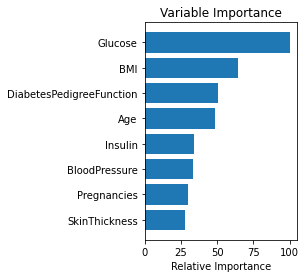

In [194]:
# Plot of feature importance 
#After working on the data above 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, diabetes_data_copy.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 4. Evaluating the model on the training data and test data

In [195]:

# -- to check how well the classifier did on training data
# this returns the mean of the accuracy of the model on the training data.. 1.0 means it is 100% accurate
clf.score(X_train, y_train)

1.0

In [196]:
#lets check how it is doing on the test data
# on test data it performs with less accuracy because it has not seen the data. .69 is still good!
clf.score(X_test, y_test)

0.7622377622377622

In [197]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [198]:

# this compares test labels vs predict labels
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        98
           1       0.63      0.60      0.61        45

    accuracy                           0.76       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.76      0.76      0.76       143



In [199]:

cm=confusion_matrix(y_test, y_predict)
cm

array([[82, 16],
       [18, 27]])

<AxesSubplot:>

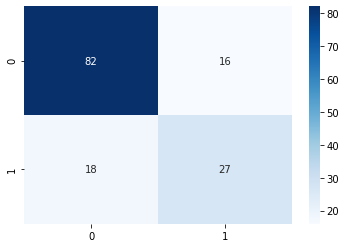

In [200]:
sns.heatmap(cm, annot=True, cmap='Blues')

#### Based on Correlation Matrix Above:
- True Positives:  (27) we correctly predicted that they do have diabetes
- True Negatives:  (82) we correctly predicted that they don't have diabetes
- False Positives: (16) we incorrectly predicted that they do have diabetes
- False Negatives: (18) we incorrectly predicted that they don't have diabetes

In [202]:
accuracy_score(y_test, y_predict)

0.7622377622377622

##  5. Improving the model
#### Trying different n_estimators

In [207]:
import numpy as np

np.random.seed(42)
for i in range (10, 70, 10):
    print(f"Trying model with {i} estimators...")
    clf= RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print("model accuracy on test set:", clf.score(X_test, y_test))

Trying model with 10 estimators...
model accuracy on test set: 0.7692307692307693
Trying model with 20 estimators...
model accuracy on test set: 0.7482517482517482
Trying model with 30 estimators...
model accuracy on test set: 0.7342657342657343
Trying model with 40 estimators...
model accuracy on test set: 0.7762237762237763
Trying model with 50 estimators...
model accuracy on test set: 0.7832167832167832
Trying model with 60 estimators...
model accuracy on test set: 0.7902097902097902


## 6. Saving and loading the trained models

In [216]:
import pickle

#Save Random Forest Model
#clf= RandomForestClassifier(n_estimators=30).fit(X_train, y_train)
#the model below will be the last one from above for loop with 60 estimators
pickle.dump(clf, open("diabetes_random_forrest_model.pkl", "wb"))


In [217]:
loaded_model= pickle.load(open("diabetes_random_forrest_model.pkl", "rb"))

In [218]:
loaded_model.score(X_test, y_test)

0.7902097902097902